## CNN

- channel을 가지는 이유는 이미지의 여러 가지의 특성을 잘 찾기 위해서
- 풀링은 이미지를 줄여서 모델이 좀 더 잘 학습하게끔 하는 것
- 그러나 이미지를 줄이게 되면 정보가 손실되므로 제로 패딩을 통해 이미지 크기를 그대로 하는 것

In [2]:
import tensorflow as tf
# from sklearn.model_selection import train_test_split



2023-10-31 16:48:36.612047: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-31 16:48:36.612084: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-31 16:48:36.612129: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-31 16:48:36.622888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 16:48:38.032740: W tensorflow/compiler/

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                           padding='same', activation='relu',
                           input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

2023-10-31 16:48:39.486999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 16:48:39.578412: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-31 16:48:39.578634: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
mnist = tf.keras.datasets.mnist

(tr_dt, tr_lb), (te_dt, te_lb) = mnist.load_data()

tr_dt, te_dt = tr_dt/255.0, te_dt/255.0

tr_dt = tr_dt.reshape((60000, 28, 28, 1))
te_dt = te_dt.reshape((10000, 28, 28, 1))

In [8]:
tr_dt

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [9]:
import time

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

star_time = time.time()
hist = model.fit(tr_dt, tr_lb, epochs=5, verbose=1,
                 validation_data=(te_dt, te_lb))

print('fit time : ', time.time()- star_time)

Epoch 1/5


2023-10-31 16:53:59.592130: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-10-31 16:54:01.489691: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-10-31 16:54:04.753499: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7315297370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-31 16:54:04.753545: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-10-31 16:54:04.760761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-31 16:54:04.882090: I ./tensorflow/compiler/jit/device_compiler.h:186] C

1875/1875 [==============================] - 18s 6ms/step - loss: 0.1116 - accuracy: 0.9653 - val_loss: 0.0367 - val_accuracy: 0.9878
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0248 - val_accuracy: 0.9923
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0288 - val_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0297 - val_accuracy: 0.9914
fit time :  57.01172113418579


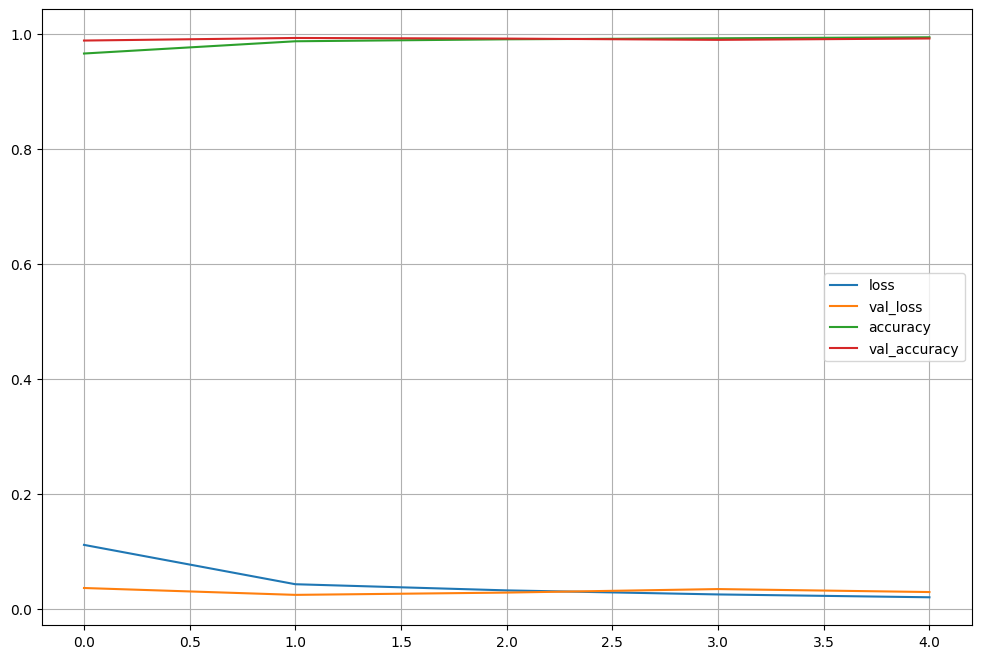

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(te_dt, te_lb)
print('test loss : ', score[0])
print('test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9914
test loss :  0.02970585972070694
test accuracy :  0.9914000034332275


In [12]:
import numpy as np

predicted_result = model.predict(te_dt)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [13]:
wrong_result = []

for n in range(0, len(te_lb)):
    if predicted_labels[n] != te_lb[n]:
        wrong_result.append(n)


len(wrong_result)

86

In [14]:
import random


samples = random.choices(population=wrong_result, k=16)
samples

[659,
 9620,
 2182,
 2654,
 4238,
 4761,
 3225,
 8287,
 6576,
 1232,
 1878,
 266,
 3853,
 1242,
 9792,
 1717]

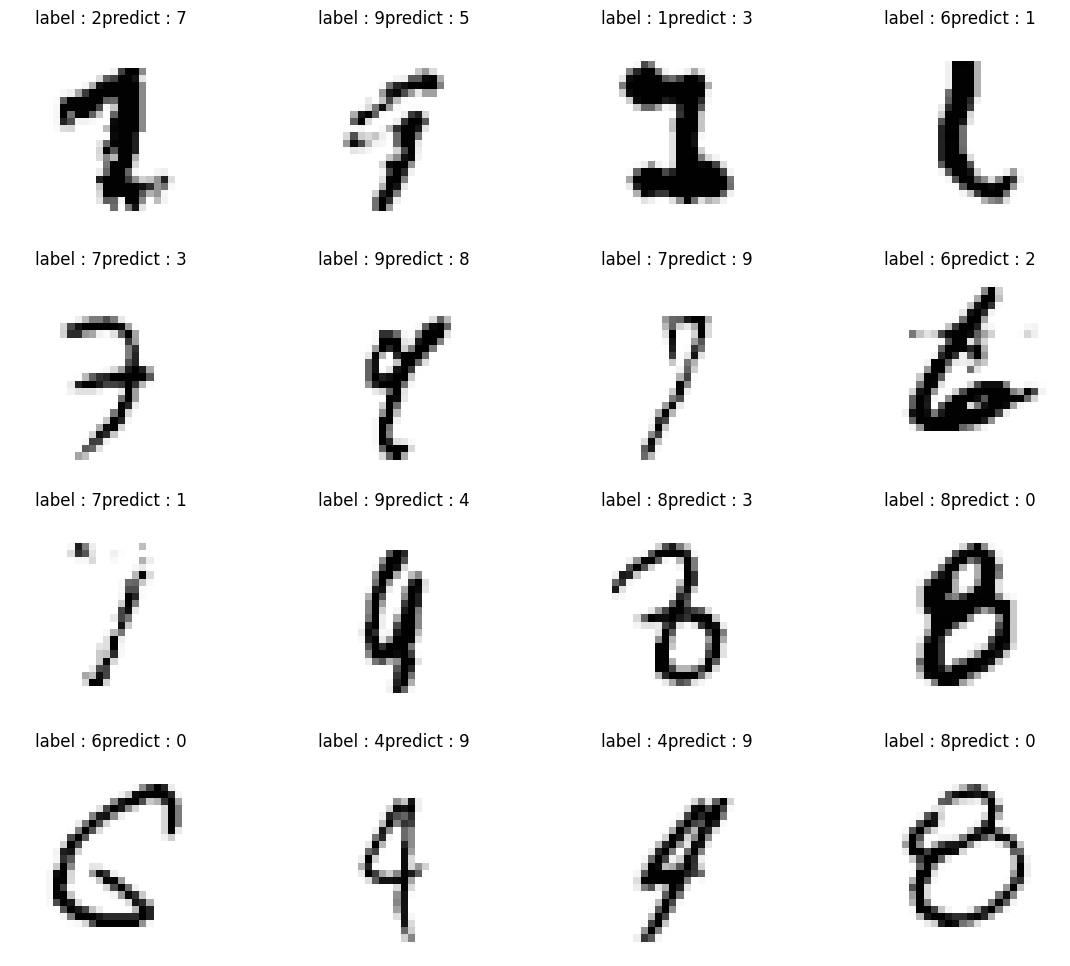

In [15]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(te_dt[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label : '+ str(te_lb[n]) + 'predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [16]:
model.save('MNIST_CNN_model.h5')

/home/soomin/venv/dl/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### fashion_MNIST

In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(tr_dt, tr_lb), (te_dt, te_lb) = fashion_mnist.load_data()

tr_dt, te_dt = tr_dt/255.0, te_dt/255.0

4422102/4422102 [==============================] - 0s 0us/step


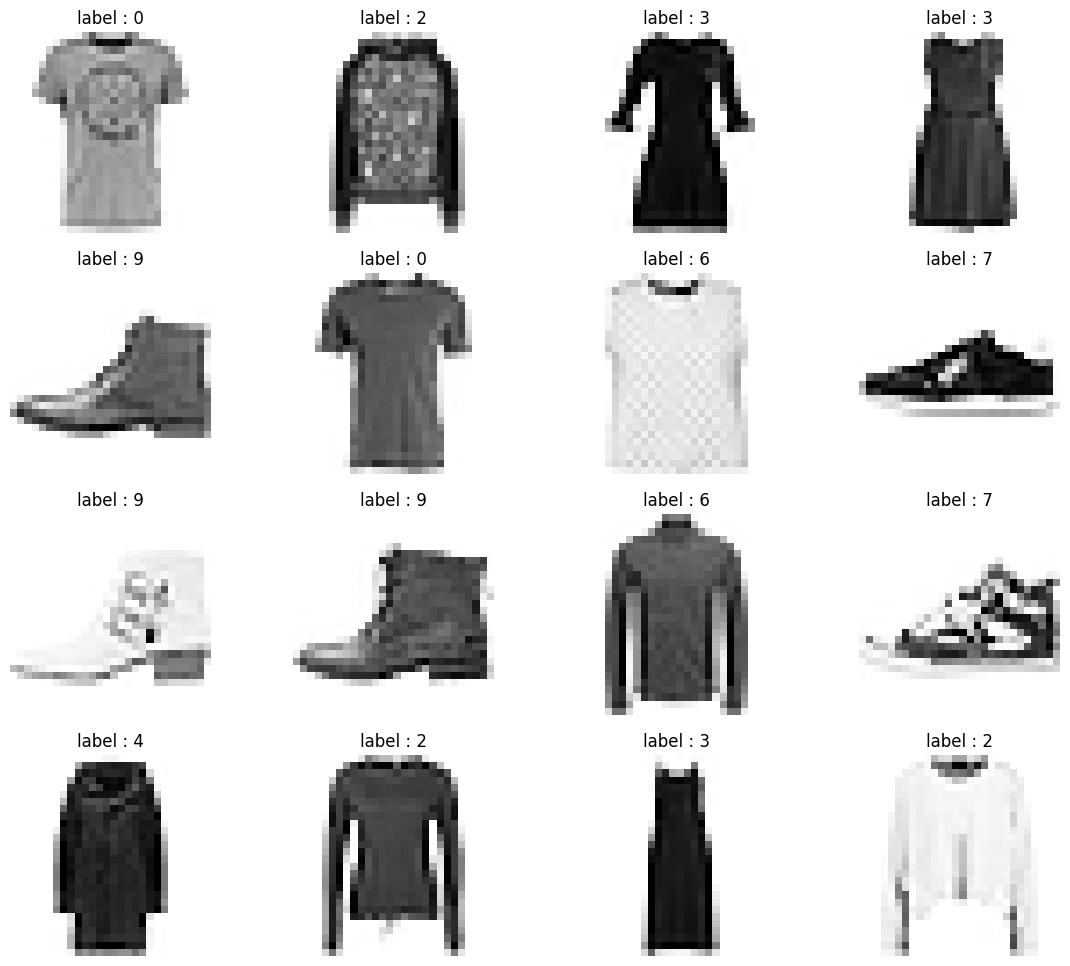

In [18]:
import random 
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0,len(tr_lb)), k=16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(tr_dt[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label : ' + str(tr_lb[n]))
    plt.axis('off')

plt.show()

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import time

star_time = time.time()
hist = model.fit(tr_dt, tr_lb, validation_data=(te_dt, te_lb),
                 epochs=10, batch_size=100, verbose=1)

print('fit time : ', time.time() - star_time)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4854 - accuracy: 0.8290 - val_loss: 0.4019 - val_accuracy: 0.8538
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.8694 - val_loss: 0.3937 - val_accuracy: 0.8523
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8823 - val_loss: 0.3790 - val_accuracy: 0.8654
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2973 - accuracy: 0.8904 - val_loss: 0.3374 - val_accuracy: 0.8785
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2784 - accuracy: 0.8956 - val_loss: 0.3528 - val_accuracy: 0.8706
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2650 - accuracy: 0.9022 - val_loss: 0.3339 - val_accuracy: 0.8812
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2527 - accuracy: 0.9063 - val_loss: 0.3236 - val_accuracy: 0.8826
Epoch 

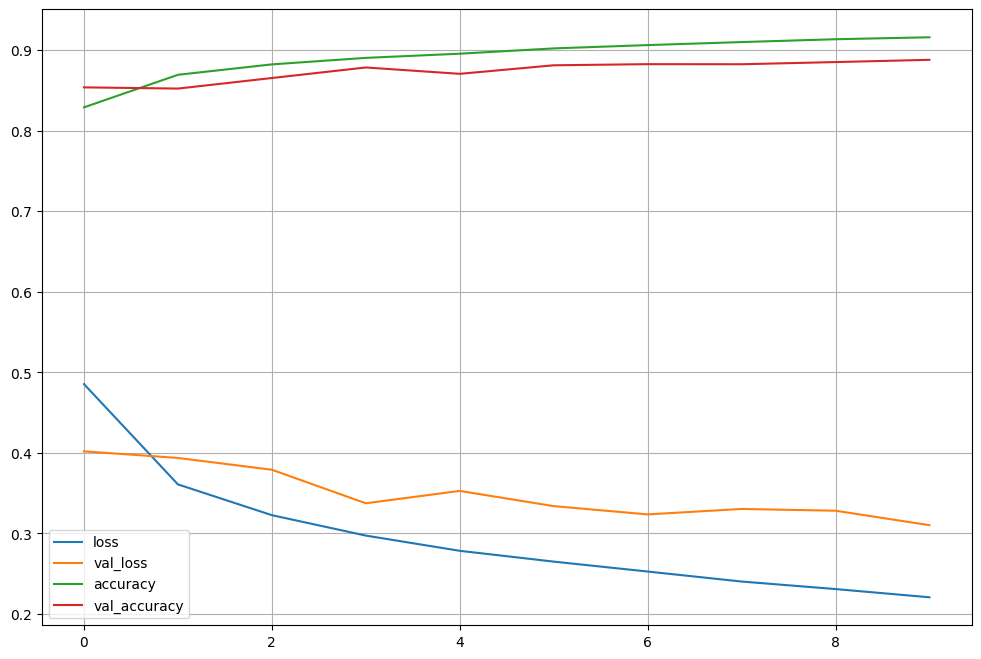

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()

In [23]:
score = model.evaluate(te_dt, te_lb)
print('test loss : ', score[0])
print('test accuracy : ', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.8880
test loss :  0.31022894382476807
test accuracy :  0.8880000114440918


In [24]:
import numpy as np

predicted_result = model.predict(te_dt)
predicted_labels = np.argmax(predicted_result, axis=1)

predicted_labels[:10]


313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [25]:
te_lb[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

### 틀린거 확인

In [26]:
wrong_result = []

for n in range(0, len(te_lb)):
    if predicted_labels[n] != te_lb[n]:
        wrong_result.append(n)


len(wrong_result)

1120

In [27]:
import random 

samples = random.choices(population=wrong_result, k=16)

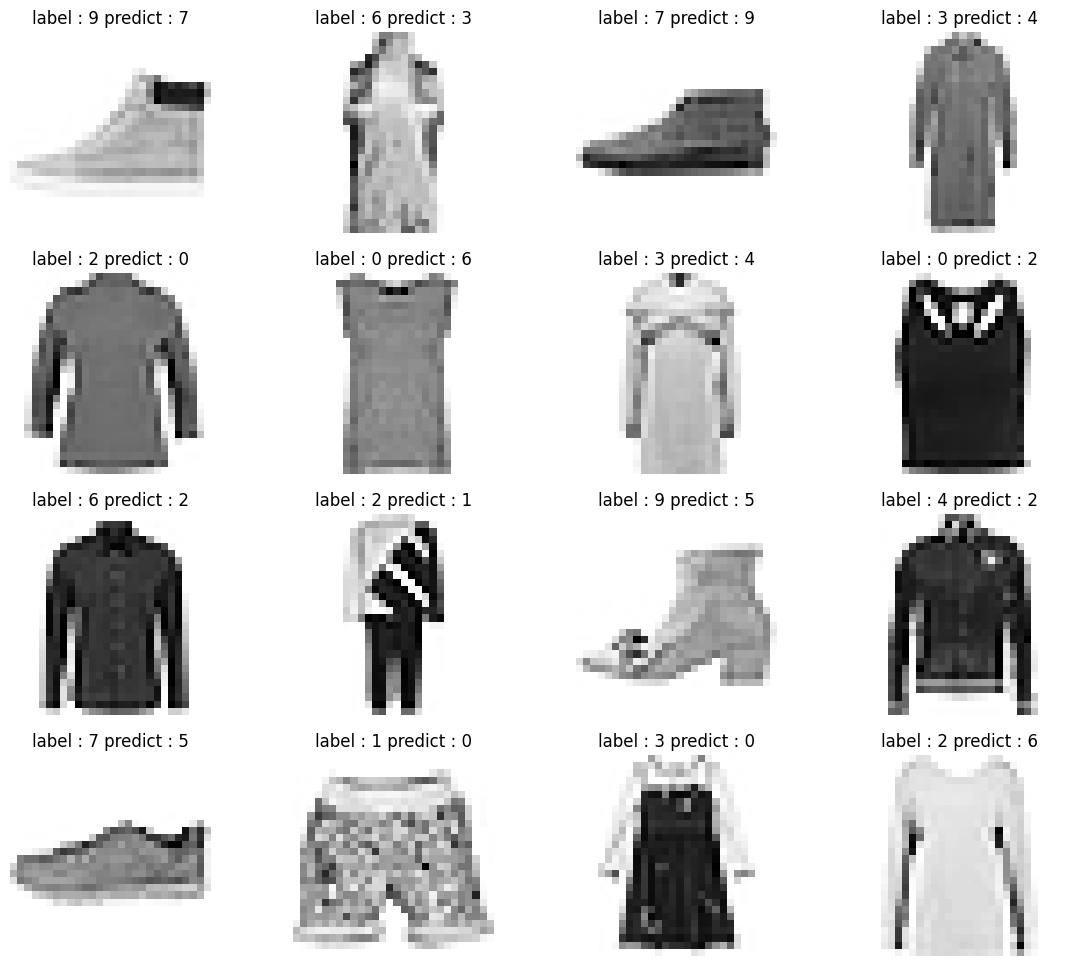

In [29]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(te_dt[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label : ' + str(te_lb[n]) + ' predict : ' + str(predicted_labels[n]))
    plt.axis('off')


plt.show()